In [1]:
import pandas as pd
import numpy as np
import streamlit as st
import altair as alt
import seaborn as sb
import scipy as sp

# Load Dataset

In [15]:
psdas_df = pd.read_csv("PSDAS_dataset.csv")
psdas_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Categorical and Numerical Features

The dataset has many categorical features. These lists provide an easy way to separate the categorical and numerical features. These will be useful when building correlation heatmaps and constructing our model later.

In [43]:
list(psdas_df.columns)
psdas_df['Curricular units 1st sem (credited)'].describe()

idx = 30
print(psdas_df['Curricular units 1st sem (grade)'][idx])
print(psdas_df['Curricular units 1st sem (approved)'][idx])
print(psdas_df['Curricular units 1st sem (grade)'][idx]/psdas_df['Curricular units 1st sem (approved)'][idx])

11.857142857142858
5
2.3714285714285714


In [57]:
psdas_df['Age at enrollment'].describe()

count    4424.000000
mean       23.265145
std         7.587816
min        17.000000
25%        19.000000
50%        20.000000
75%        25.000000
max        70.000000
Name: Age at enrollment, dtype: float64

In [3]:
categorical_feature_names = ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', 'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']
numerical_feature_names = psdas_df.drop(columns=categorical_feature_names).drop(columns='Target').columns.to_list()

print(f"Categorical Features: {categorical_feature_names}")
print(f"Numerical Features: {numerical_feature_names}")

Categorical Features: ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']
Numerical Features: ['Application order', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']


# Correlation Heatmap

### Numerical Feature Correlation

/tmp/ipykernel_6072/546481132.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(psdas_df.drop(columns=categorical_feature_names).corr())


<Axes: >

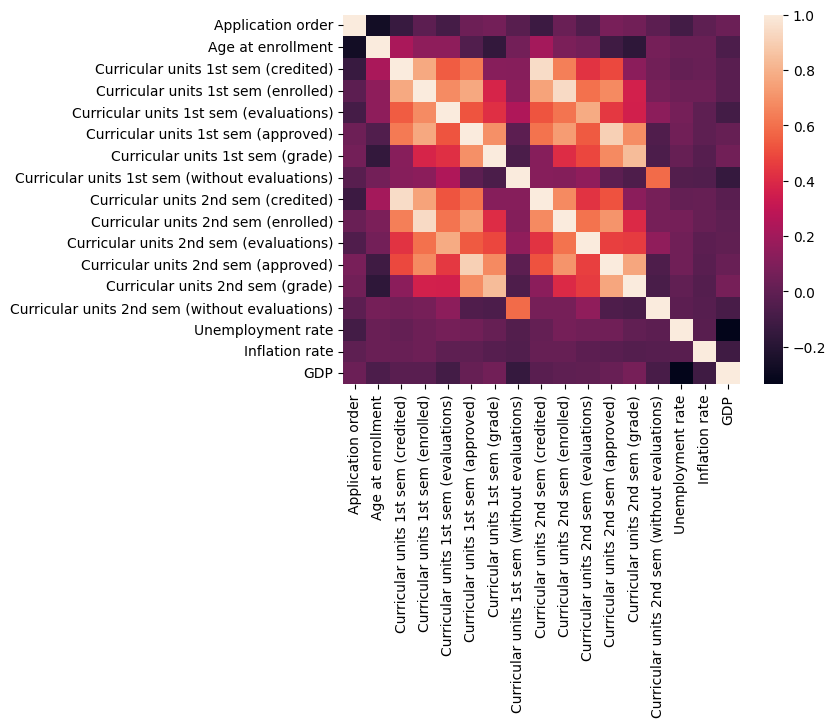

In [4]:
sb.heatmap(psdas_df.drop(columns=categorical_feature_names).corr())

### Categorical Feature Association

**TODO:** Not sure what to do for categorical correlation. It isn't really a thing. Maybe we leave it out? No clue how the research paper created their heatmap.

Looking at the Target feature shows us there are three classes in our data. We just want to determine if someone will graduate or drop out, so we are going to remove all of the data samples where the Target is still enrolled. This is effectively binaraizing our dataset.

In [5]:
psdas_df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [6]:
binarized_df = psdas_df.drop(psdas_df[psdas_df.Target == 'Enrolled'].index)
binarized_df['Target'].unique()

array(['Dropout', 'Graduate'], dtype=object)

In [48]:
# Remove unwanted features
# Drop Application Mode
# Drop previous qualification
# Drop Mother/Father qualification
# Drop Mother/Father occupation
model_features=['Marital status',
 'Course',
 'Daytime/evening attendance',
 'Nacionality',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (approved)',
 'Curricular units 2nd sem (approved)',
 'Unemployment rate',
 'Inflation rate',
 'GDP',
 'Target']

clean_df = binarized_df[model_features].copy()

clean_categorical_feature_names = ['Marital status', 'Course', 'Daytime/evening attendance', 'Nacionality', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']
clean_numerical_feature_names = ['Age at enrollment', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)', 'Unemployment rate', 'Inflation rate', 'GDP']

Now we will use pycaret to build a classification model.

In [9]:
from pycaret.classification import *

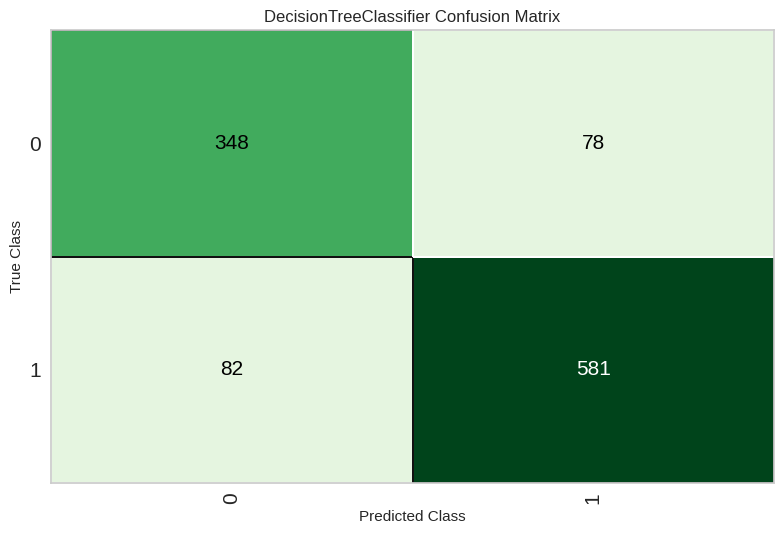

In [51]:
plot_model(PSDAS_dt, plot="confusion_matrix")

In [56]:
finalize_model(PSDAS_dt)
save_model(PSDAS_dt, 'saved_dt_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age at enrollment',
                                              'Curricular units 1st sem '
                                              '(approved)',
                                              'Curricular units 2nd sem '
                                              '(approved)',
                                              'Unemployment rate',
                                              'Inflation rate', 'GDP...
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, c

In [74]:
course = {
    "Biofuel Production Technologies":1,
    "Animation and Multimedia Design":2,
    "Social Service (evening attendance)":3,
    "Agronomy":4,
    "Communication Design":5,
    "Veterinary Nursing":6,
    "Informatics Engineering":7,
    "Equiniculture":8,
    "Management":9,
    "Social Service":10,
    "Tourism":10,
    "Nursing":11,
    "Oral Hygiene":12,
    "Advertising and Marketing Management":13,
    "Journalism and Communication":14,
    "Basic Education":15,
    "Management (evening attendance)":16,
}



def get_course_name(val):
    for key, value in course.items():
        if val == value:
            return key

psdas_df = psdas_df.apply(course_name=get_course_name(psdas_df['Course']))

name_df[['Course', 'course_name']]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# H2
## H2
### H3

* list
* of
* Things

* Bar Chart - Changes target(x-axis) based on factors chosen along with frequency(y-axis) (see figure 3).
* Heat Map - Shows colored correlation between different factors to see where most students have factors in common.
* Linear regression or scatter plot ? Based on how students are most likely to succeed or not and how they can improve.